In [98]:
import requests 
import pandas as pd
from io import StringIO

In [99]:
response = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')
data = response.content.decode('utf-8')
df = pd.read_csv(StringIO(data))
print(df.head)

<bound method NDFrame.head of      Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TA

# TASK - 2

Text(0.5, 1.0, "Median value of owner-occupied homes in $1000's")

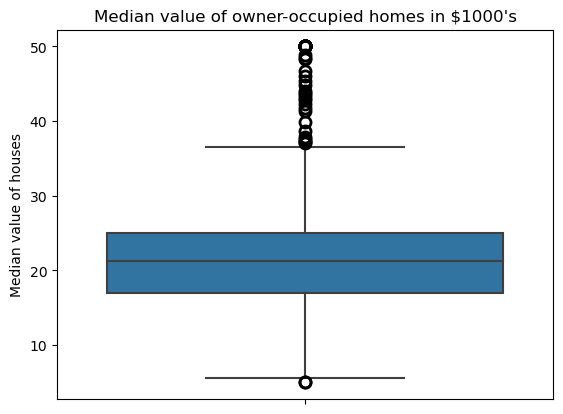

In [100]:
import seaborn as sns
import matplotlib.pyplot as pyplot

sns.boxplot(y=df['MEDV'],data=df,flierprops=dict(marker='o', color='none',markerfacecolor='none',  markeredgecolor='black', markersize=8, markeredgewidth=2))
pyplot.ylabel("Median value of houses")
pyplot.title("Median value of owner-occupied homes in $1000's")

Text(0.5, 0, 'Charles River Dummy Variable')

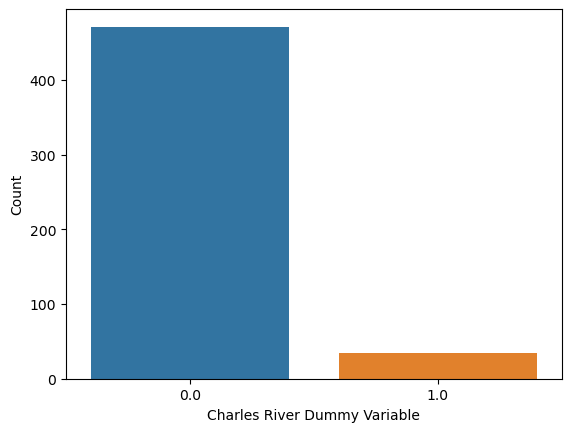

In [101]:
sns.countplot(x=df['CHAS'], data=df)
pyplot.ylabel("Count")
pyplot.xlabel("Charles River Dummy Variable")

Text(0.5, 0, 'Age Group')

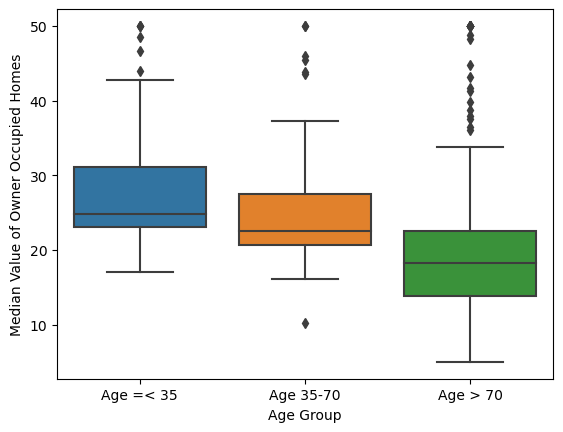

In [102]:
df['Age Group'] = pd.cut(df['AGE'], bins=[0, 35, 70, float('inf')], labels=['Age =< 35', 'Age 35-70', 'Age > 70'])
sns.boxplot(x='Age Group', y='MEDV', data=df)
pyplot.ylabel("Median Value of Owner Occupied Homes")
pyplot.xlabel("Age Group")

Text(0.5, 0, 'Nitric Oxide')

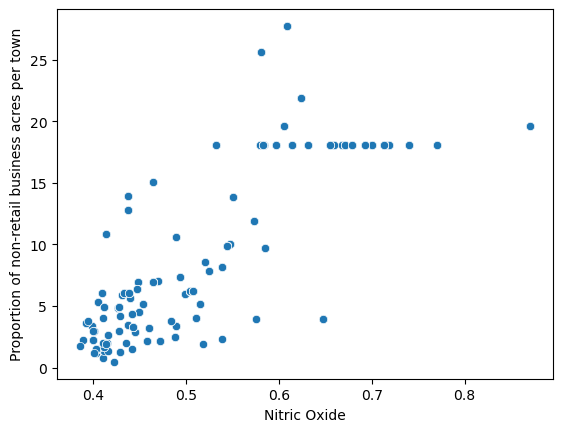

In [103]:
sns.scatterplot(x='NOX', y='INDUS', data=df)
pyplot.ylabel("Proportion of non-retail business acres per town")
pyplot.xlabel("Nitric Oxide")

Text(0.5, 0, 'Pupil to Teacher Ratio')

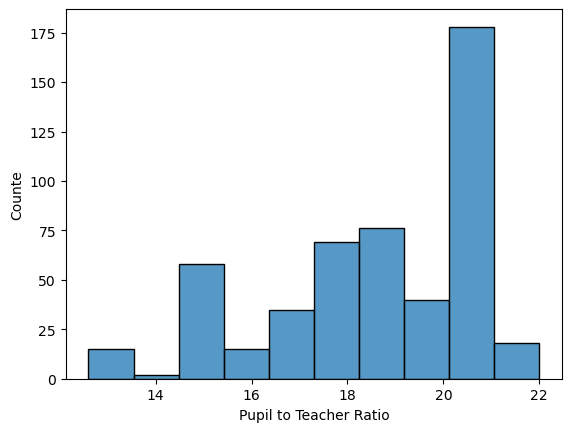

In [104]:
sns.histplot(df['PTRATIO'], bins=10, kde=False)
pyplot.ylabel("Counte")
pyplot.xlabel("Pupil to Teacher Ratio")

# TASK 3

In [105]:
#Hypothesis -
#No-1. There is significant difference between the median value of household bounded by the Charles river.
#No-2. No significant difference between the median value of household bounded by the Charles river.

#Lets find out
from scipy.stats import ttest_ind

houses_not_bound_by_charles = df[df['CHAS'] == 0]['MEDV']
houses_bound_by_charles = df[df['CHAS'] == 1]['MEDV']

t_stat, p_value = ttest_ind(houses_not_bound_by_charles,houses_bound_by_charles)
print(t_stat, p_value)
p_value = "{:.5f}".format(p_value)
print("p_value=" + p_value)


-3.996437466090509 7.390623170519905e-05
p_value=0.00007


In [106]:
#p-value came out to be <0.05, that means null hypothesis(Hypothesis No-2)  can be rejected.

#Conclusion
#Hypothesis No-1 is true : There is significant difference between the median value of household bounded by the Charles river

In [107]:
#Hypothesis -
#No-1. There is a differnce in Median value of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).
#No-2. There is No differnce in Median value of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

#Lets find out
from scipy.stats import f_oneway

age1 = df[df['AGE'] <= 35]['MEDV']
age2 = df[(df['AGE'] > 35) & (df['AGE'] < 70)]['MEDV']
age3 = df[df['AGE'] > 70]['MEDV']

t_stat, p_value =  f_oneway(age1, age2, age3)
print(t_stat, p_value)
p_value = "{:.20f}".format(p_value)
print("p_value=" + p_value)

36.40764999196599 1.7105011022702984e-15
p_value=0.00000000000000171050


In [108]:
#p-value came out to be <0.05, that means null hypothesis(Hypothesis No-2)  can be rejected.

#Conclusion
#Hypothesis No-1 is true : There is a difference in Median value of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [109]:
#Hypothesis -
#No-1. There is a relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town.
#No-2. There is no relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town.

#Lets find out
from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(df['NOX'], df['INDUS'])
print(correlation_coefficient, p_value)
p_value = "{:.100f}".format(p_value)
print("p_value=" + p_value)

0.763651446920915 7.913361061241167e-98
p_value=0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000791


In [110]:
#p-value came out to be <0.05, that means null hypothesis(Hypothesis No-2)  can be rejected.

#Conclusion
#Hypothesis No-1 is true : There is a relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town?

In [111]:
#Hypothesis -
#No-1. There is an impact of an additional weighted distance to the five Boston employment on the median value of owner occupied homes.
#No-2. There is no impact of an additional weighted distance to the five Boston employment on the median value of owner occupied homes.

#Lets find out
import statsmodels.api as sm

X = sm.add_constant(df['DIS'])
Y = df['MEDV']
model = sm.OLS(Y, X).fit()
print(model.summary())
p_value = model.pvalues['DIS']
p_value = "{:.10f}".format(p_value)
print("p_value=" + p_value)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 03 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        18:39:39   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [ ]:
#p-value came out to be <0.05, that means null hypothesis(Hypothesis No-2)  can be rejected.

#Conclusion
#Hypothesis No-1 is true : There is an impact of an additional weighted distance to the five Boston employment on the median value of owner occupied homes.